<a href="https://colab.research.google.com/github/Durruuti/Red_neuronal_python-tensorfflow/blob/main/miprimeraredneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Aumento de conjunto de entrenamiento,capas y neuronas

In [143]:
celsius = np.array([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], dtype=float)
fahrenheit = (celsius * 1.8) + 32

In [144]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
train_celsius = celsius[:15]
train_fahrenheit = fahrenheit[:15]
test_celsius = celsius[15:]
test_fahrenheit = fahrenheit[15:]

Añadido Dropout a la definicion del modelo

Actualización de modelo 13:22 18/04/2023

In [146]:
# Definir el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, input_shape=[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=1, kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

Añadido el optimizador Dropout

In [148]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_absolute_error',
    metrics=['mean_squared_error']
)

Modiicado la variable historial añadiendo Dropout

Actualización modelo 13:24 18/04/2023

In [170]:
# Entrenar el modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(train_celsius, train_fahrenheit, epochs=500, verbose=False, validation_data=(test_celsius, test_fahrenheit))
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


In [171]:
# Evaluar el modelo en el conjunto de prueba
loss, mse = modelo.evaluate(test_celsius, test_fahrenheit)
print("Pérdida en el conjunto de prueba (MAE): ", loss)
print("Error cuadrático medio en el conjunto de prueba (MSE): ", mse)

1/1 [==============================] - 0s 29ms/step - loss: 1.2633 - mean_squared_error: 1.2329
Pérdida en el conjunto de prueba (MAE):  1.263340711593628
Error cuadrático medio en el conjunto de prueba (MSE):  1.2329212427139282


In [172]:
# Hacer una predicción
resultado = modelo.predict([100.0])
print("El resultado es:", resultado[0][0], "fahrenheit")

1/1 [==============================] - 0s 41ms/step
El resultado es: 212.90143 fahrenheit


A las 13:35 tras varios entrenamientos, ha llegado al valor esperado 212


Cambio de los valores de la gráfica

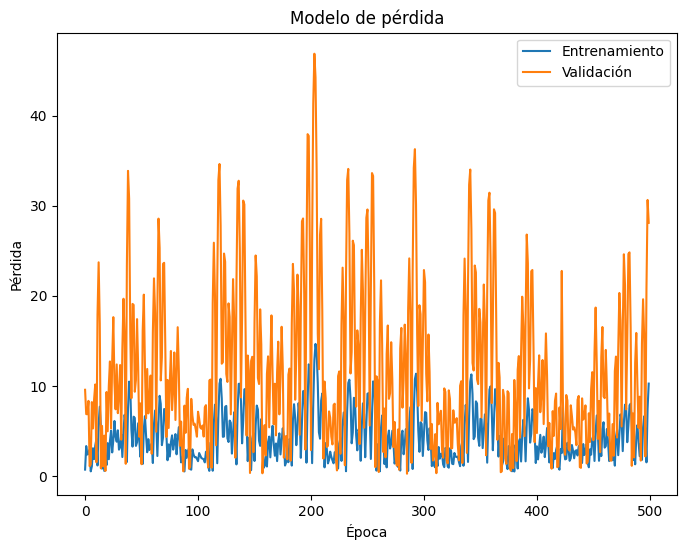

In [169]:
# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(8, 6))
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.title('Modelo de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()


In [153]:
# Imprimir las variables internas del modelo
for capa in modelo.layers:
    pesos, sesgos = capa.get_weights()
    print("Pesos:", pesos)
    print("Sesgos:", sesgos)


Pesos: [[-0.20934801 -0.15751575 -0.00705003 -0.05489331 -0.29580075 -0.00320822
  -0.17546096 -0.2827544  -0.01760824 -0.11934771 -0.07000379  0.37112802
  -0.23928994 -0.01060124  0.42483637 -0.01738775 -0.256009   -0.41291776
  -0.22585648 -0.09589902 -0.21257377 -0.24802928 -0.16098455 -0.17381302
  -0.34401616 -0.16795161 -0.6632231  -0.1557706  -0.2618741  -0.11454237
   0.3385161  -0.01364083]]
Sesgos: [-3.5139384  -3.0322633   0.5342034  -1.0175673  -0.10805204 -0.05481778
 -3.4017065  -3.8621273   0.46290633 -1.252985   -1.5875596   1.4746652
 -3.5918367   0.4709326   1.015956    0.2694356  -4.4151354  -4.8394394
 -3.8687174  -2.526117   -3.3982015  -3.2722726  -2.1894562  -3.8956194
 -2.2450526  -3.1277237  -3.8246744   0.19431648 -3.5361447  -3.1952884
  0.26384217  0.66594553]
Pesos: [[ 1.1004536e-12 -2.3062949e-03 -5.9472058e-12 ... -2.5836690e-03
   7.7027863e-12 -3.4286035e-10]
 [ 4.1841921e-13 -8.4272521e-03  1.0906194e-11 ... -6.1498247e-03
  -1.3153204e-11  3.7067283e